In [19]:
from sklearn.svm import LinearSVC , SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# **Training a Linear Classifier**

To understand support vector machines, we must understand hyperplanes.

**What is a hyperplane?**

| Dimension of Data | Shape of Hyperplane                                        |
| ----------------- | ---------------------------------------------------------- |
| 2D                | Line                                                       |
| 3D                | Flat plane                                                 |
| 4D                | 3D-like surface (hard to imagine, but mathematically fine) |


In [12]:
# Load data with only two classes and two features
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]


In [13]:
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [14]:
# Create support vector classifier
svc = LinearSVC(C=1.0)

# Train model
model = svc.fit(features_standardized, target)

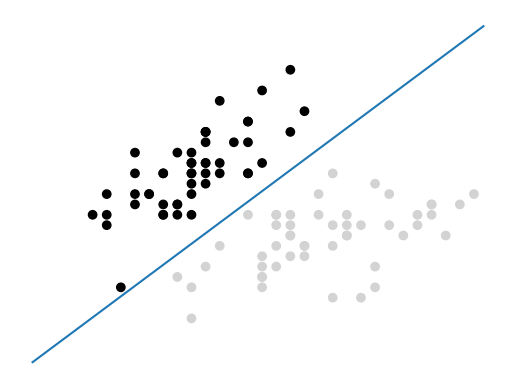

In [15]:
# Plot data points and color using their class
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

creating a new observation in the top-left corner of our visualization

In [16]:
# Create new observation
new_observation = [[ -2, 3]]

# Predict class of new observation
svc.predict(new_observation)

array([0])

# **Handling Linearly Inseparable Classes Using Kernels**

In [17]:
# Set randomization seed
np.random.seed(0)

# Generate two features
features = np.random.randn(200, 2)

# Use a XOR gate (you don't need to know what this is) to generate
# linearly inseparable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

**Support Vector Machines (SVM) – Key Points**

* **Mathematical Form:**

  $$
  f(x) = β_0 + \sum_{i \in S} α_i \, K(x_i, x_i')
  $$

  * **β₀**: Bias term
  * **S**: Set of support vectors
  * **αᵢ**: Model parameters (learned during training)
  * **K**: Kernel function (measures similarity between $x_i$ and $x_i'$)



In [18]:
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# Train the classifier
model = svc.fit(features, target)



**Role of the Kernel (K)**

* Determines the **type of hyperplane** used to separate classes.
* By changing the kernel, we can change the shape of the decision boundary.

---

**Common Kernels**

1. **Linear Kernel**

   $$
   K(x_i, x_i') = \sum_{j=1}^p x_{ij} \, x'_{ij}
   $$

   * Produces a straight linear hyperplane.
   * Use when data is **linearly separable**.

2. **Polynomial Kernel**

   $$
   K(x_i, x_i') = \left(1 + \sum_{j=1}^p x_{ij} \, x'_{ij}\right)^d
   $$

   * $d$ = degree of the polynomial.
   * Creates **nonlinear boundaries**.

3. **Radial Basis Function (RBF) Kernel**

   $$
   K(x_i, x_i') = e^{-\gamma \sum_{j=1}^p (x_{ij} - x'_{ij})^2}
   $$

   * $\gamma > 0$ is a hyperparameter controlling curve flexibility.
   * Can handle very complex, curved decision boundaries.

---

**Key Idea**

* If the data **cannot be separated by a straight line** (linear hyperplane),
  we can choose a **nonlinear kernel** (e.g., Polynomial, RBF) to map it to a higher-dimensional space where separation is possible.



In [21]:
# Plot observations and decision boundary hyperplane
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker="+", label=cl)

/tmp/ipython-input-491556356.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


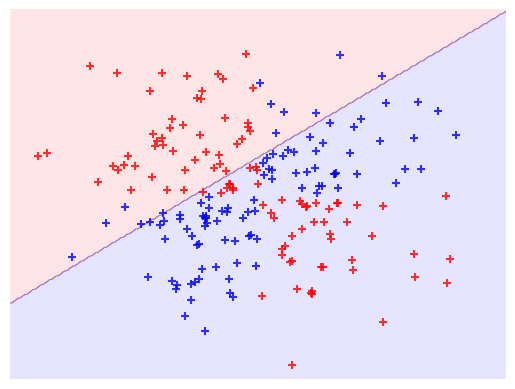

In [22]:
svc_linear = SVC(kernel="linear", random_state=0, C=1)

svc_linear.fit(features, target)

plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off"), plt.show();

/tmp/ipython-input-491556356.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


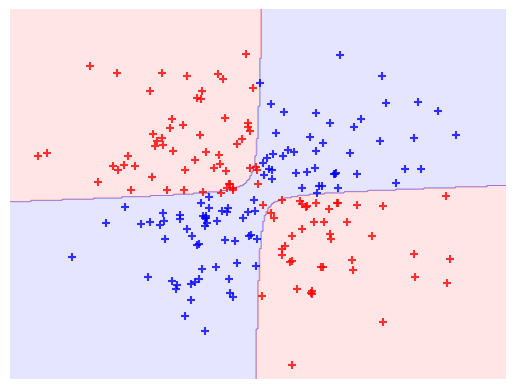

In [34]:
svc_poly = SVC(kernel='poly', degree=2, random_state=0, C=1)

model = svc_poly.fit(features, target)

plot_decision_regions(features, target, classifier=svc_poly)
plt.axis("off"), plt.show();

/tmp/ipython-input-491556356.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


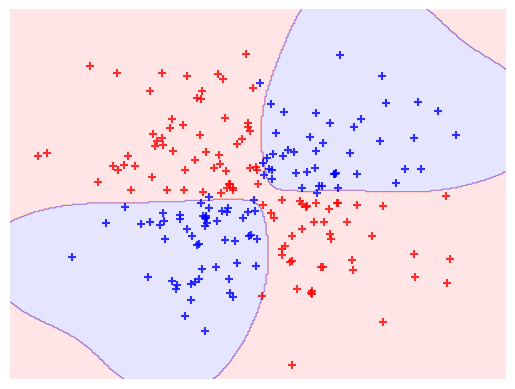

In [36]:
svc_rbf = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

model = svc_rbf.fit(features, target)

plot_decision_regions(features, target, classifier=svc_rbf)
plt.axis("off"), plt.show();

# **Creating Predicted Probabilities**

In [37]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [38]:
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [39]:
# Create support vector classifier object
svc = SVC(kernel="linear", probability=True, random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)

# Create new observation
new_observation = [[.4, .4, .4, .4]]

# View predicted probabilities
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

**How SVC Produces Probabilities**

Formula:

$$
P(y=1|x) = \frac{1}{1 + e^{A \cdot f(x) + B}}
$$

$A, B$ → parameters learned in logistic regression

$f(x)$ → signed distance of the observation from the hyperplane
